In [1]:
#pandas is used for creating DataFrames for more elaborate datasets and analysis
import pandas as pd
#matplotlib is used to plot and manipulate illustrations (i.e., in IPython)
import matplotlib.pyplot as plt
#Seaborn is a powerful data visualization library
import seaborn as sns
import numpy as np

In [2]:
# Create DataFrame using Pandas and set Column names
sc = pd.read_csv('train.csv')
# Show descriptive statistics on dimensional distributions
print(sc.describe())
print(sc.head())

                   X              Y
count  878049.000000  878049.000000
mean     -122.422616      37.771020
std         0.030354       0.456893
min      -122.513642      37.707879
25%      -122.432952      37.752427
50%      -122.416420      37.775421
75%      -122.406959      37.784369
max      -120.500000      90.000000
                 Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, 

In [3]:
# get the name of the 10 most common crimes
most_common_cat = sc['Category'].value_counts()[0:11].index.tolist()

# extract the most common crimes from the database
most_commons = sc[sc['Category'].apply(lambda x: x in most_common_cat)]

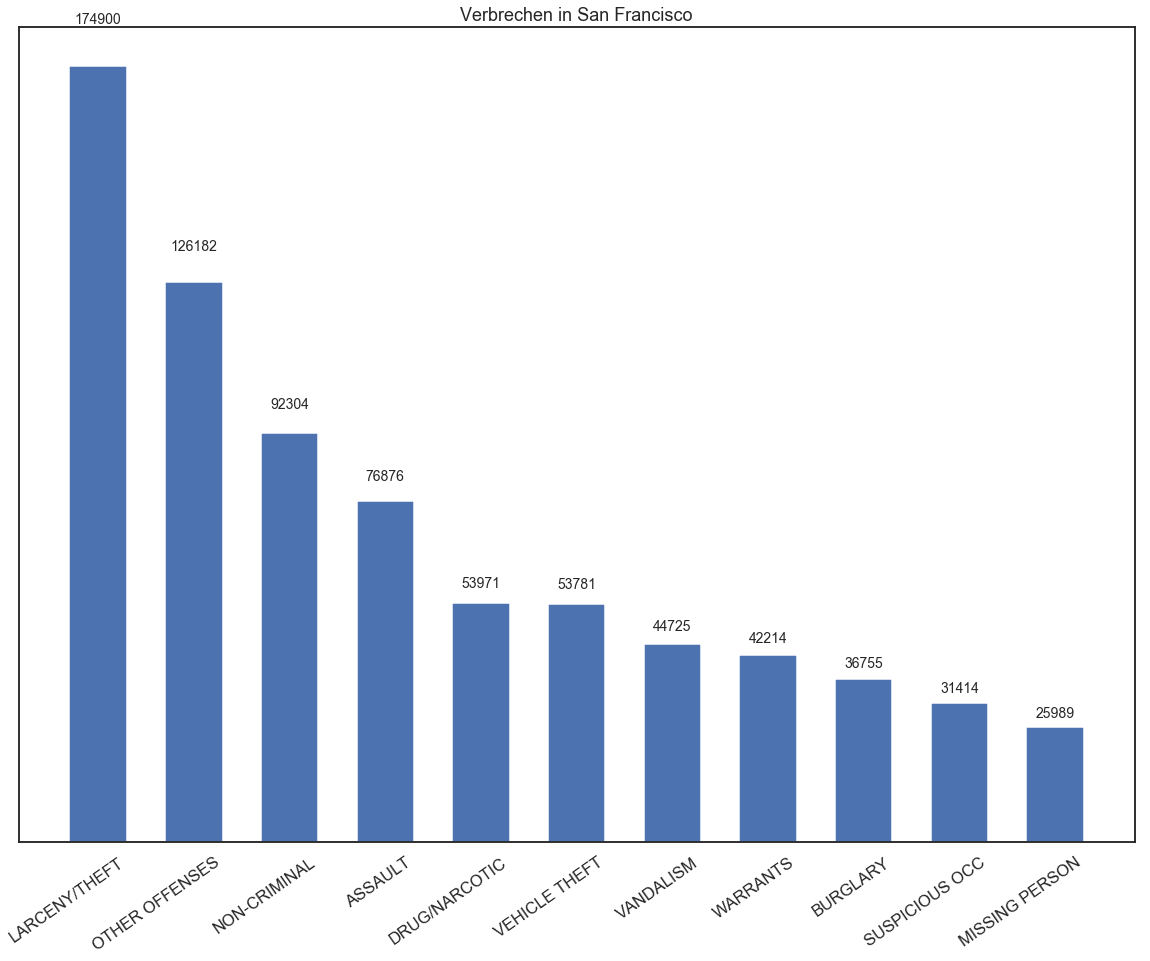

In [4]:
labels = most_commons['Category'].value_counts().index.tolist()
Y =  most_commons['Category'].value_counts().tolist()

# define a bar plot
sns.set(style="white",context="talk")
fig,ax = plt.subplots(figsize=(20,15))

width = 0.6 # width of the bars
ind = np.arange(len(labels))

rect = ax.bar(ind,Y,width)

# function to draw the label
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=14)

autolabel(rect)

plt.xticks(ind+width/2,labels,rotation=35,ha='right')
ax.yaxis.set_visible(False)
plt.title('Verbrechen in San Francisco')
plt.savefig('crimes_agg.png')
plt.show()